In [1]:
from langchain_ollama import OllamaEmbeddings
from langchain_ollama import ChatOllama

In [3]:
# loader_pdf = PyMuPDFLoader("/Users/silalertbanjongngam/Desktop/AI_learn/NAIST_GUIDEBOOK.pdf")
# pages_pdf = loader_pdf.load()
# for i in range(len(pages_pdf)):
#     pages_pdf[i].page_content = ' '.join(pages_pdf[i].page_content.split())  # Remove line breaks

# pages_pdf


from langchain_community.document_loaders import PyMuPDFLoader

loader_pdf = PyMuPDFLoader("/Users/silalertbanjongngam/Desktop/ttb-chatbot/PrinciplesForManagementofCreditRisk.pdf")
pages_pdf = loader_pdf.load()

# Define the new metadata you want to use
new_metadata = {
    "name": "Credit Risk Management Guidebook 2024",
    "description": "comprehensive guide on principles for managing credit risk.",
}

for i in range(len(pages_pdf)):
    # 1. Clean the content (your original code)
    pages_pdf[i].page_content = ' '.join(pages_pdf[i].page_content.split())  # Remove line breaks
    
    # 2. OVERWRITE the metadata
    # We use .copy() to ensure each page gets its own dictionary instance
    pages_pdf[i].metadata = new_metadata.copy()

# Check the result
print(pages_pdf)

[Document(metadata={'name': 'Credit Risk Management Guidebook 2024', 'description': 'comprehensive guide on principles for managing credit risk.'}, page_content='Credit risk management 1 Principles for the Management of Credit Risk I. Introduction 1. While financial institutions have faced difficulties over the years for a multitude of reasons, the major cause of serious banking problems continues to be directly related to lax credit standards for borrowers and counterparties, poor portfolio risk management, or a lack of attention to changes in economic or other circumstances that can lead to a deterioration in the credit standing of a bank’s counterparties. This experience is common in both G-10 and non-G-10 countries. 2. Credit risk is most simply defined as the potential that a bank borrower or counterparty will fail to meet its obligations in accordance with agreed terms. The goal of credit risk management is to maximise a bank’s risk-adjusted rate of return by maintaining credit r

In [4]:
from langchain_text_splitters.character import CharacterTextSplitter
char_splitter = CharacterTextSplitter(
    separator=".",
    chunk_size=300,
    chunk_overlap=50,
)

In [5]:
pages_char_split = char_splitter.split_documents(pages_pdf)

Created a chunk of size 415, which is longer than the specified 300
Created a chunk of size 350, which is longer than the specified 300
Created a chunk of size 344, which is longer than the specified 300
Created a chunk of size 388, which is longer than the specified 300
Created a chunk of size 307, which is longer than the specified 300
Created a chunk of size 973, which is longer than the specified 300
Created a chunk of size 315, which is longer than the specified 300
Created a chunk of size 316, which is longer than the specified 300
Created a chunk of size 461, which is longer than the specified 300
Created a chunk of size 347, which is longer than the specified 300
Created a chunk of size 429, which is longer than the specified 300
Created a chunk of size 397, which is longer than the specified 300
Created a chunk of size 308, which is longer than the specified 300
Created a chunk of size 312, which is longer than the specified 300
Created a chunk of size 332, which is longer tha

In [6]:
embed = OllamaEmbeddings(model="mxbai-embed-large:latest")

In [7]:
vector1 = embed.embed_query(pages_char_split[1].page_content)

In [9]:
from langchain_community.vectorstores import Chroma
vector_store = Chroma.from_documents(
    documents=pages_char_split,
    embedding=embed,
    persist_directory = "/Users/silalertbanjongngam/Desktop/ttb-chatbot/credit_risk_management_guidebook_vectorstore"
)
vectorstore_from_directory = Chroma(persist_directory = "/Users/silalertbanjongngam/Desktop/ttb-chatbot/credit_risk_management_guidebook_vectorstore", 
                                    embedding_function = embed)



/var/folders/l1/dlc_jzs90vj3g01l0jr_866w0000gn/T/ipykernel_27433/3874778851.py:7: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the `langchain-chroma package and should be used instead. To use it run `pip install -U `langchain-chroma` and import as `from `langchain_chroma import Chroma``.
  vectorstore_from_directory = Chroma(persist_directory = "/Users/silalertbanjongngam/Desktop/ttb-chatbot/credit_risk_management_guidebook_vectorstore",


In [13]:
print(vectorstore_from_directory.get())

{'ids': ['7cbf476e-1486-4d9a-b475-6f50fd6475bc', 'd85a82f1-a422-4c5b-a5d8-69733e144d19', 'd8497de6-076b-4b8a-8ba9-351d55864ca9', '392228c7-1d88-45f5-bccf-e450a741906c', 'd8532f73-40c3-4aad-b9f2-1f3ba52cbf2e', 'a7406f75-7460-4a3c-bdca-430e2f855b0a', 'db674252-5fbe-44a3-999a-d221d746debd', 'd2ede22b-0709-4fb0-bdda-5700cf95686c', 'f174f68a-85b5-4c40-8495-59d3048bb18d', '5a8ef544-6713-4a7a-8cb1-fadec276e480', '74e8df86-f904-4d8b-b97f-54a3b8eb0f8e', 'f9054e66-e77c-447d-baf3-80a14981fb00', '38924e58-1dc5-4af1-9f09-65a64b8fa53e', '5ea87716-42ec-4d11-b1ff-d08f7951f505', 'eedc85fa-2ad6-489e-94f2-3ff973fead20', '805fce6a-529c-4c86-b7a9-20a922057865', 'e9344924-e966-4dfd-881e-105c32f57678', '7b3a25c1-b10f-40ed-be5f-5084873d4fc0', '6ec33f22-3e57-4520-b4c4-efce2be085e5', '112cf910-4170-4483-aacf-ae3dabdb3150', 'a14014f7-bff4-4314-9b8d-f4f041b120e1', 'e9a2059d-a087-447f-a991-5f2720f62920', 'c2f0e8f6-bd6d-4868-bb98-fea7f5fd20f2', '33df0498-aa89-444f-90aa-35004913c7d5', '120be9b2-047e-458b-b74a-7ca636

In [12]:
# 1. Set your desired threshold (0 to 1)
# Note: For Chroma with Cosine Similarity, 1 is perfect match, 0 is no match.
threshold = 0.7 
question = "What about credit risk mangement"
# 2. Use the method that returns (Document, Score) tuples
results_with_scores = vectorstore_from_directory.similarity_search_with_relevance_scores(
    query=question, 
    k=5
)

# 3. Filter the list based on the score
retrieved_docs = [doc for doc, score in results_with_scores if score >= threshold]

# Optional: Print scores to see what's happening
for doc, score in results_with_scores:
    print(f"Score: {score:.4f} | Content: {doc.page_content[:50]}...")

Score: 0.7820 | Content: The goal of credit risk management is to maximise ...
Score: 0.7554 | Content: 75. The goal of credit risk management is to maint...
Score: 0.7449 | Content: Banks should also consider the relationships betwe...
Score: 0.7199 | Content: Credit risk management 1 Principles for the Manage...
Score: 0.7100 | Content: Credit risk management 7 Each bank should develop ...


In [14]:
from typing import Optional, Literal, Dict, Any
from pydantic import BaseModel, Field
from langchain_core.prompts import PromptTemplate
from langgraph.graph import START, END, StateGraph
from langchain_community.chat_models import ChatOllama
from datetime import datetime
from langchain_community.vectorstores import Chroma
from langchain_text_splitters.character import CharacterTextSplitter
from langchain_ollama import OllamaEmbeddings
from langchain_community.document_loaders import PyMuPDFLoader

# 1. Configuration
llm = ChatOllama(model="gemma3:4b", temperature=0.2, max_completion_tokens=50)
embed = OllamaEmbeddings(model="mxbai-embed-large:latest")
# 1. Set your desired threshold (0 to 1)
# Note: For Chroma with Cosine Similarity, 1 is perfect match, 0 is no match.
vectorstore_from_directory = Chroma(persist_directory = "/Users/silalertbanjongngam/Desktop/ttb-chatbot/credit_risk_management_guidebook_vectorstore", 
                                    embedding_function = embed)


class GraphState(BaseModel):
    user_input: str
    decision: Optional[Literal["สินชื่อ", "เปิดบัญชีอย่างไร", "ยอดเงินไม่เข้า", "สแกนจ่ายไม่ได้", "unknown"]] = Field(default=None)
    final_output: Optional[str] = Field(default=None)
    raw_metadata: Dict[str, Any] = Field(default_factory=dict)

def retrieve_relevant_docs(query: str, threshold: float):

    # 1. Use the method that returns both the Doc and the Score
    # Note: 'k' here is the initial pool to check before filtering
    results_with_scores = vectorstore_from_directory.similarity_search_with_relevance_scores(
        query, 
        k=5
    )

    # 2. Filter based on your threshold
    # results_with_scores is a list of tuples: [(Document, score), ...]
    filtered_docs = [
        doc for doc, score in results_with_scores 
        if score >= threshold
    ]

    return filtered_docs

def validator(state: GraphState):
    """Hybrid Validator: String matching for buttons (0 tokens), LLM for text."""
    user_input = state.user_input.strip().lower()
    # Fast Path: Check if input exactly matches button options
    valid_options = ["สินชื่อ", "เปิดบัญชีอย่างไร", "ยอดเงินไม่เข้า", "สแกนจ่ายไม่ได้"]
    if user_input in valid_options:
        return {
            "decision": user_input, 
            "raw_metadata": {"method": "string_match", "tokens": 0, "time": datetime.now().isoformat()} 
        }
    return {"decision": "unknown"}

def option1_node(state: GraphState):
    response = (PromptTemplate.from_template("Tell me about strawberry in 10 words") | llm).invoke({})
    return {"final_output": response.content, "raw_metadata": response.response_metadata}

def option2_node(state: GraphState):
    response = (PromptTemplate.from_template("Tell me about Apple in 10 words") | llm).invoke({})
    return {"final_output": response.content, "raw_metadata": response.response_metadata}

def option3_node(state: GraphState):
    response = (PromptTemplate.from_template("Tell me about Orange in 10 words") | llm).invoke({})
    return {"final_output": response.content, "raw_metadata": response.response_metadata}

def option4_node(state: GraphState):
    response = (PromptTemplate.from_template("Tell me about Grape in 10 words") | llm).invoke({})
    return {"final_output": response.content, "raw_metadata": response.response_metadata}
#-------------------------------------------
# def unknown_node(state: GraphState):
#     """Handles free-text inquiry using the model."""
#     prompt = PromptTemplate.from_template("You are a helpful AI assistant. Answer this: {user_input} in very brief to the point.***used same language as user***")
#     chain = prompt | llm
#     # We MUST pass the user_input here so the model knows what to answer
#     response = chain.invoke({"user_input": state.user_input})
#     return {"final_output": response.content, "raw_metadata": response.response_metadata}
#-------------------------------------------

from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

def unknown_node(state: GraphState):
    """Handles free-text inquiry using RAG with threshold fallback logic."""
    user_input = state.user_input
    th = 0.75
    
    # 1. Try High Threshold (0.8)
    rag_results = retrieve_relevant_docs(user_input, threshold=th)
    
    # Check if we got results
    if len(rag_results) > 0:
        context_text = rag_results[0].page_content
        template = """You are an AI assistant for TTB bank. Answer the user based ONLY on context.
        Context: {context}
        Question: {question}
        Keep it professional and use the same language as the user."""
        
        prompt = PromptTemplate.from_template(template)
        chain = ({"context": lambda x: context_text, "question": RunnablePassthrough()} 
                 | prompt | llm | StrOutputParser())
        
        answer = chain.invoke(user_input)
        return {"final_output": answer}

    # 2. Try Lower Threshold (0.6)
    low_th = th - 0.15
    rag_results_low = retrieve_relevant_docs(user_input, threshold=low_th)
    
    if len(rag_results_low) > 0:
        context_text = rag_results_low[0].page_content
        template = """You are an AI assistant for TTB bank. 
        Create a new recommended question by adding on this context.
        Context: {context}
        User Query: {question}
        Keep it concise and use the same language as the user."""
        
        prompt = PromptTemplate.from_template(template)
        chain = ({"context": lambda x: context_text, "question": RunnablePassthrough()} 
                 | prompt | llm | StrOutputParser())
        
        recommendation = chain.invoke(user_input)
        return {"final_output": recommendation}

    # 3. Default Fallback (No Context Found)
    else:
        fallback_prompt = PromptTemplate.from_template(
            'You are a helpful AI assistant. Say: "I don\'t have that information about {user_input}" '
            'briefly and in the same language as the user.'
        )
        chain = fallback_prompt | llm | StrOutputParser()
        answer = chain.invoke({"user_input": user_input})
        return {"final_output": answer}



# 4. Router Logic
def router(state: GraphState):
    """Maps the decision string to the actual node name."""
    if state.decision in ["สินชื่อ", "เปิดบัญชีอย่างไร", "ยอดเงินไม่เข้า", "สแกนจ่ายไม่ได้"]:
        return state.decision
    return "unknown"

# 5. Graph Construction
builder = StateGraph(GraphState)

builder.add_node("validator", validator)
builder.add_node("option1_node", option1_node)
builder.add_node("option2_node", option2_node)
builder.add_node("option3_node", option3_node)
builder.add_node("option4_node", option4_node)
builder.add_node("unknown_node", unknown_node)

builder.add_edge(START, "validator")
builder.add_conditional_edges("validator", router, {
    "สินชื่อ": "option1_node",
    "เปิดบัญชีอย่างไร": "option2_node",
    "ยอดเงินไม่เข้า": "option3_node",
    "สแกนจ่ายไม่ได้": "option4_node",
    "unknown": "unknown_node"
})


builder.add_edge("option1_node", END)
builder.add_edge("option2_node", END)
builder.add_edge("option3_node", END)
builder.add_edge("option4_node", END)
builder.add_edge("unknown_node", END)

# Export for FastAPI
# graph = builder.compile()

In [15]:
graph = builder.compile()

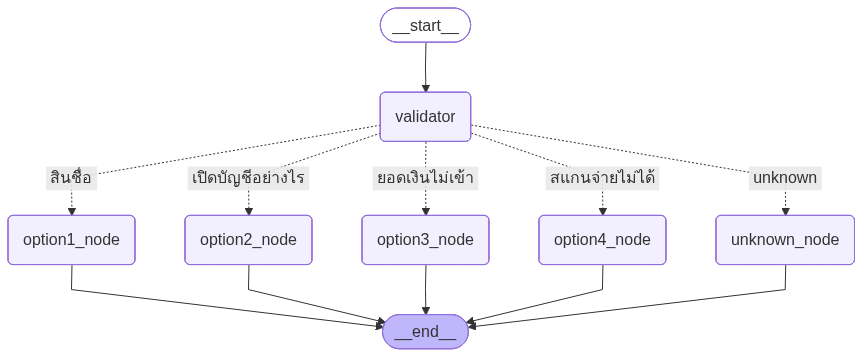

In [16]:
graph

In [22]:
user_input = "How to manage credit risk effectively?"
context_text = retrieved_docs[0].page_content
template = """You are an AI assistant for TTB bank. 
Create a new recommended question by adding on this context.
Context: {context}
User Query: {question}
Keep it concise and use the same language as the user."""

prompt = PromptTemplate.from_template(template)
chain = ({"context": lambda x: context_text, "question": RunnablePassthrough()} 
                | prompt | llm )
        
recommendation = chain.invoke(user_input)
print({"final_output": recommendation})

{'final_output': AIMessage(content='How to manage credit risk effectively, considering both the overall portfolio and individual credits?', additional_kwargs={}, response_metadata={'model': 'gemma3:4b', 'created_at': '2026-01-08T07:51:50.78779038Z', 'message': {'role': 'assistant', 'content': ''}, 'done': True, 'done_reason': 'stop', 'total_duration': 8011228003, 'load_duration': 282363000, 'prompt_eval_count': 109, 'prompt_eval_duration': 2825099876, 'eval_count': 17, 'eval_duration': 4879798751}, id='lc_run--019b9c97-09a9-7803-899d-faf6aa8a5cfb-0')}


In [18]:
context_text = retrieved_docs[0].page_content


In [29]:
recommendation.response_metadata

{'model': 'gemma3:4b',
 'created_at': '2026-01-08T07:51:50.78779038Z',
 'message': {'role': 'assistant', 'content': ''},
 'done': True,
 'done_reason': 'stop',
 'total_duration': 8011228003,
 'load_duration': 282363000,
 'prompt_eval_count': 109,
 'prompt_eval_duration': 2825099876,
 'eval_count': 17,
 'eval_duration': 4879798751}